In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ckd=pd.read_csv("final.csv")

In [3]:
ckd.shape

(400, 17)

In [4]:
ckd.head()

,Age,Bp,Al,Rbc,Pc,Bgr,Bu,Sc,Sod,Pot,Hemo,Pcv,Wbcc,Rbcc,Htn,Dm,Class
0,48.0,80.0,1.0,0.81,1.0,121.00,36.0,1.2,137.53,4.63,15.4,44.0,7800.0,5.20,1.0,1,ckd
1,7.0,50.0,4.0,0.81,1.0,148.04,18.0,0.8,137.53,4.63,11.3,38.0,6000.0,4.71,0.0,0,ckd
2,62.0,80.0,2.0,1.00,1.0,423.00,53.0,1.8,137.53,4.63,9.6,31.0,7500.0,4.71,0.0,1,ckd
3,48.0,70.0,4.0,1.00,0.0,117.00,56.0,3.8,111.00,2.50,11.2,32.0,6700.0,3.90,1.0,0,ckd
4,51.0,80.0,2.0,1.00,1.0,106.00,26.0,1.4,137.53,4.63,11.6,35.0,7300.0,4.60,0.0,0,ckd


In [5]:
y = ckd['Class']

In [6]:
y.head()

0    ckd
1    ckd
2    ckd
3    ckd
4    ckd
Name: Class, dtype: object

In [7]:
new_ckd = ckd.drop('Class', axis=1)

In [8]:
new_ckd.head()

,Age,Bp,Al,Rbc,Pc,Bgr,Bu,Sc,Sod,Pot,Hemo,Pcv,Wbcc,Rbcc,Htn,Dm
0,48.0,80.0,1.0,0.81,1.0,121.00,36.0,1.2,137.53,4.63,15.4,44.0,7800.0,5.20,1.0,1
1,7.0,50.0,4.0,0.81,1.0,148.04,18.0,0.8,137.53,4.63,11.3,38.0,6000.0,4.71,0.0,0
2,62.0,80.0,2.0,1.00,1.0,423.00,53.0,1.8,137.53,4.63,9.6,31.0,7500.0,4.71,0.0,1
3,48.0,70.0,4.0,1.00,0.0,117.00,56.0,3.8,111.00,2.50,11.2,32.0,6700.0,3.90,1.0,0
4,51.0,80.0,2.0,1.00,1.0,106.00,26.0,1.4,137.53,4.63,11.6,35.0,7300.0,4.60,0.0,0


In [9]:
new_ckd = pd.get_dummies(new_ckd)
new_ckd

,Age,Bp,Al,Rbc,Pc,Bgr,Bu,Sc,Sod,Pot,Hemo,Pcv,Wbcc,Rbcc,Htn,Dm
0,48.0,80.0,1.0,0.81,1.0,121.00,36.0,1.2,137.53,4.63,15.4,44.0,7800.0,5.20,1.0,1
1,7.0,50.0,4.0,0.81,1.0,148.04,18.0,0.8,137.53,4.63,11.3,38.0,6000.0,4.71,0.0,0
2,62.0,80.0,2.0,1.00,1.0,423.00,53.0,1.8,137.53,4.63,9.6,31.0,7500.0,4.71,0.0,1
3,48.0,70.0,4.0,1.00,0.0,117.00,56.0,3.8,111.00,2.50,11.2,32.0,6700.0,3.90,1.0,0
4,51.0,80.0,2.0,1.00,1.0,106.00,26.0,1.4,137.53,4.63,11.6,35.0,7300.0,4.60,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,0.0,1.00,1.0,140.00,49.0,0.5,150.00,4.90,15.7,47.0,6700.0,4.90,0.0,0
396,42.0,70.0,0.0,1.00,1.0,75.00,31.0,1.2,141.00,3.50,16.5,54.0,7800.0,6.20,0.0,0
397,12.0,80.0,0.0,1.00,1.0,100.00,26.0,0.6,137.00,4.40,15.8,49.0,6600.0,5.40,0.0,0
398,17.0,60.0,0.0,1.00,1.0,114.00,50.0,1.0,135.00,4.90,14.2,51.0,7200.0,5.90,0.0,0


In [10]:
new_ckd = new_ckd.drop('Age', axis=1)

In [11]:
print(ckd.groupby('Class').size())

Class
ckd       250
notckd    150
dtype: int64


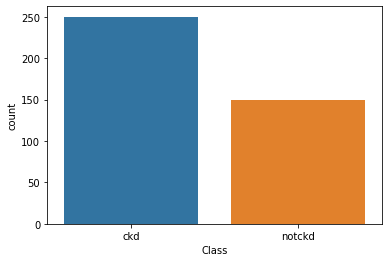

In [12]:
import seaborn as sns

sns.countplot(ckd['Class'],label="Count")

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_ckd, y, test_size=0.2, random_state=0)

In [16]:
#random forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.988


In [17]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.994
Accuracy on test set: 0.988


In [ ]:
# Save the model in local env.

In [18]:
import pickle
# open a file, where you ant to store the data
file = open('Kidney_Prediction.pkl', 'wb')

# dump information to that file
pickle.dump(rf1, file)

In [20]:
predict_train_data = rf1.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.988
